In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("TugasWeek9").getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

df = spark.createDataFrame(data, schema=columns)

df.createOrReplaceTempView('employees')

print("Menampilkan seluruh data dari tabel employees:")
spark.sql('SELECT * FROM employees').show()

print("Menampilkan nama dan umur karyawan dengan gaji lebih dari 3000:")
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()

print("Hasil rata-rata gaji seluruh karyawan:")
spark.sql('SELECT AVG(Salary) AS Avg_Salary FROM employees').show()

Menampilkan seluruh data dari tabel employees:


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

Menampilkan nama dan umur karyawan dengan gaji lebih dari 3000:


+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

Hasil rata-rata gaji seluruh karyawan:
+------------------+
|        Avg_Salary|
+------------------+
|3266.6666666666665|
+------------------+



In [20]:
print("Total gaji berdasarkan jenis kelamin dan usia")
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

Total gaji berdasarkan jenis kelamin dan usia


[Stage 50:>                                                         (0 + 2) / 2]

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [19]:
print("Rata-rata Gaji per Departemen")
spark.sql('''
SELECT
    DeptId,
    AVG(Salary) as AvgSalary
FROM
    employees
GROUP BY
    DeptId
ORDER BY
    DeptId
''').show()

Rata-rata Gaji per Departemen


[Stage 47:>                                                         (0 + 2) / 2]

+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+



In [41]:
print("Karyawan dengan Gaji di Atas Rata-rata untuk Gender Masing-masing:")
spark.sql("""
    SELECT Name, Gender, Salary, Avg_Salary_Gender
    FROM (
        SELECT *,
               AVG(Salary) OVER (PARTITION BY Gender) AS Avg_Salary_Gender
        FROM employees
    ) T1
    WHERE Salary >= Avg_Salary_Gender
""").show()

Karyawan dengan Gaji di Atas Rata-rata untuk Gender Masing-masing:


[Stage 145:============================>                            (1 + 1) / 2]

+-----+------+------+-----------------+
| Name|Gender|Salary|Avg_Salary_Gender|
+-----+------+------+-----------------+
| Anna|     F|  4100|           4100.0|
|James|     M|  3000|           2850.0|
+-----+------+------+-----------------+



In [31]:
print("Ranking Karyawan Berdasarkan Gaji dalam Departemen Mereka:")
spark.sql('''
    SELECT 
        Name, 
        DeptId, 
        Salary,
        RANK() OVER (
            PARTITION BY DeptId 
            ORDER BY Salary DESC
        ) AS Dept_Rank
    FROM 
        employees
    ORDER BY
        DeptId, Dept_Rank
''').show()

Ranking Karyawan Berdasarkan Gaji dalam Departemen Mereka:
+-----+------+------+---------+
| Name|DeptId|Salary|Dept_Rank|
+-----+------+------+---------+
|James|     1|  3000|        1|
|  Lee|     1|  2700|        2|
| Anna|     2|  4100|        1|
+-----+------+------+---------+



In [23]:
print("Top 3 karyawan dalam kelompok usia tertentu:")
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

Top 3 karyawan dalam kelompok usia tertentu:


[Stage 59:=============================>                            (1 + 1) / 2]

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [25]:
print("Menampilkan Detail Karyawan Beserta Nama Departemen dan Proyek yang Dikelola Departemen Mereka:")
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

Menampilkan Detail Karyawan Beserta Nama Departemen dan Proyek yang Dikelola Departemen Mereka:


[Stage 72:>                                                         (0 + 2) / 2]

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [29]:
print("Rata-rata Gaji Departemen dan Rangking Karyawan dalam Departemen:")
spark.sql('''
SELECT
    Name,
    DeptId,
    Salary,
    AVG(Salary) OVER (PARTITION BY DeptId) AS Avg_Salary_Dept,
    DENSE_RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Dept_Rank
FROM
    employees
ORDER BY
    DeptId, Dept_Rank
''').show()

Rata-rata Gaji Departemen dan Rangking Karyawan dalam Departemen:
+-----+------+------+---------------+---------+
| Name|DeptId|Salary|Avg_Salary_Dept|Dept_Rank|
+-----+------+------+---------------+---------+
|James|     1|  3000|         2850.0|        1|
|  Lee|     1|  2700|         2850.0|        2|
| Anna|     2|  4100|         4100.0|        1|
+-----+------+------+---------------+---------+



In [32]:
print("Tren Gaji Berdasarkan Usia di Setiap Departemen:")
spark.sql('''
SELECT
    Name,
    DeptId,
    Age,
    Salary,
    LAG(Salary, 1) OVER (
        PARTITION BY DeptId 
        ORDER BY Age ASC
    ) AS Prev_Younger_Salary,
    LEAD(Salary, 1) OVER (
        PARTITION BY DeptId 
        ORDER BY Age ASC
    ) AS Next_Older_Salary
FROM
    employees
ORDER BY
    DeptId, Age
''').show()

Tren Gaji Berdasarkan Usia di Setiap Departemen:
+-----+------+---+------+-------------------+-----------------+
| Name|DeptId|Age|Salary|Prev_Younger_Salary|Next_Older_Salary|
+-----+------+---+------+-------------------+-----------------+
|  Lee|     1| 23|  2700|               NULL|             3000|
|James|     1| 34|  3000|               2700|             NULL|
| Anna|     2| 28|  4100|               NULL|             NULL|
+-----+------+---+------+-------------------+-----------------+



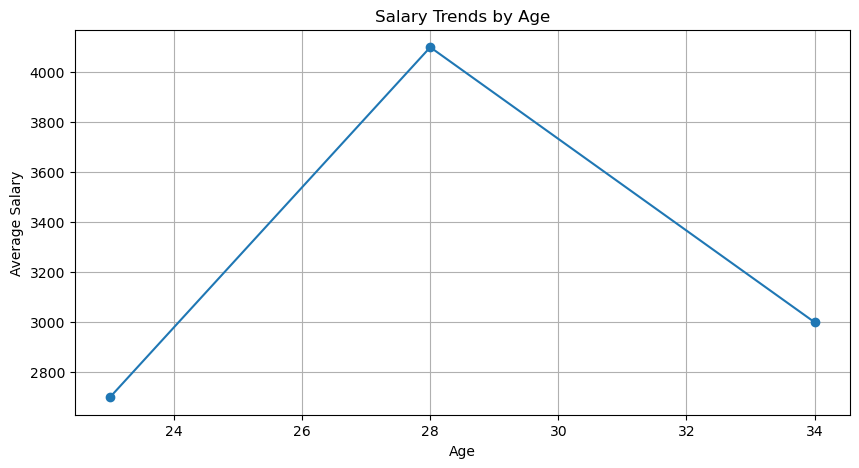

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

In [48]:
print("HOMEWORK")

HOMEWORK


In [57]:
import random

departments = ["HR", "Finance", "IT", "Marketing", "Operations", "R&D"]
names = [f"Karyawan_{i}" for i in range(1, 121)]  

data = []
for i, name in enumerate(names):
    dept = random.choice(departments)
    age = random.randint(22, 55)
    salary = random.randint(4000000, 15000000)
    data.append((i+1, name, dept, age, salary))

columns = ["EmpID", "Name", "Department", "Age", "Salary"]
df = spark.createDataFrame(data, columns)
df.show(5)

[Stage 249:>                                                        (0 + 1) / 1]

+-----+----------+----------+---+--------+
|EmpID|      Name|Department|Age|  Salary|
+-----+----------+----------+---+--------+
|    1|Karyawan_1|Operations| 50| 8036211|
|    2|Karyawan_2|Operations| 36|12168662|
|    3|Karyawan_3|       R&D| 52| 5019987|
|    4|Karyawan_4| Marketing| 43| 7555074|
|    5|Karyawan_5|Operations| 49| 4205829|
+-----+----------+----------+---+--------+
only showing top 5 rows


Total gaji dan jumlah karyawan per departemen:


+----------+------------+---------------+
|Department|Total_Salary|Total_Employees|
+----------+------------+---------------+
|Operations|   277998183|             26|
|       R&D|   201211564|             21|
|        HR|   200403294|             23|
| Marketing|   170035919|             19|
|        IT|   155100211|             17|
|   Finance|   126049164|             14|
+----------+------------+---------------+



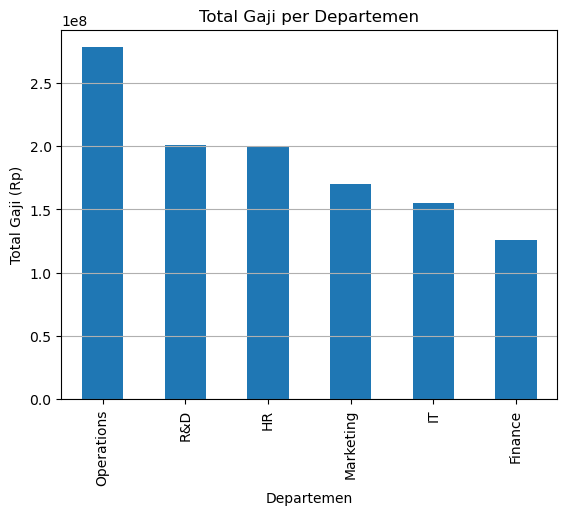

In [58]:
print("Total gaji dan jumlah karyawan per departemen:")

df.createOrReplaceTempView("employees")

tugas1 = spark.sql("""
    SELECT 
        Department,
        SUM(Salary) AS Total_Salary,
        COUNT(*) AS Total_Employees
    FROM employees
    GROUP BY Department
    ORDER BY Total_Salary DESC
""")
tugas1.show()

pdf1 = tugas1.toPandas()
pdf1.plot(kind='bar', x='Department', y='Total_Salary', legend=False)
plt.title("Total Gaji per Departemen")
plt.xlabel("Departemen")
plt.ylabel("Total Gaji (Rp)")
plt.grid(axis='y')
plt.show()

Karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia 


+-----------+---------+--------+-----------------+
|       Name|Age_Group|  Salary|       Avg_Salary|
+-----------+---------+--------+-----------------+
| Karyawan_2|   Dewasa|12168662|9581625.088235294|
| Karyawan_7|   Dewasa|12500680|9581625.088235294|
|Karyawan_15|   Dewasa|10758409|9581625.088235294|
|Karyawan_19|   Dewasa| 9812258|9581625.088235294|
|Karyawan_22|   Dewasa|14325798|9581625.088235294|
|Karyawan_41|   Dewasa|10653261|9581625.088235294|
|Karyawan_42|   Dewasa|13700748|9581625.088235294|
|Karyawan_48|   Dewasa|13999777|9581625.088235294|
|Karyawan_54|   Dewasa|10351268|9581625.088235294|
|Karyawan_56|   Dewasa|12607687|9581625.088235294|
+-----------+---------+--------+-----------------+
only showing top 10 rows


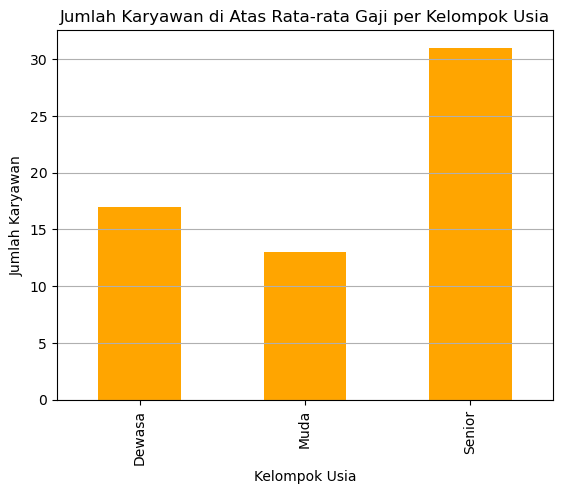

In [60]:
print("Karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia ")

from pyspark.sql.functions import when, col, avg, sum, count

df = df.withColumn(
    "Age_Group",
    when(col("Age") < 30, "Muda")
    .when((col("Age") >= 30) & (col("Age") < 40), "Dewasa")
    .otherwise("Senior")
)

df.createOrReplaceTempView("employees")

tugas2 = spark.sql("""
    SELECT 
        Name, 
        Age_Group, 
        Salary,
        AVG(Salary) OVER (PARTITION BY Age_Group) AS Avg_Salary
    FROM employees
""")

above_avg = tugas2.filter(col("Salary") > col("Avg_Salary"))
above_avg.show(10)

pdf2 = above_avg.toPandas()
pdf2.groupby("Age_Group")["Name"].count().plot(kind='bar', color='orange')
plt.title("Jumlah Karyawan di Atas Rata-rata Gaji per Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Karyawan")
plt.grid(axis='y')
plt.show()

+----------+---------------+-----------+----------+-------------------+
|Department|Jumlah_Karyawan| Rata2_Gaji|Total_Gaji|Anggaran_Departemen|
+----------+---------------+-----------+----------+-------------------+
|Operations|             26|1.0692238E7| 277998183|          100000000|
|       R&D|             21|  9581503.0| 201211564|          150000000|
|        HR|             23|  8713187.0| 200403294|           50000000|
| Marketing|             19|  8949259.0| 170035919|           80000000|
|        IT|             17|  9123542.0| 155100211|          120000000|
|   Finance|             14|  9003512.0| 126049164|           70000000|
+----------+---------------+-----------+----------+-------------------+



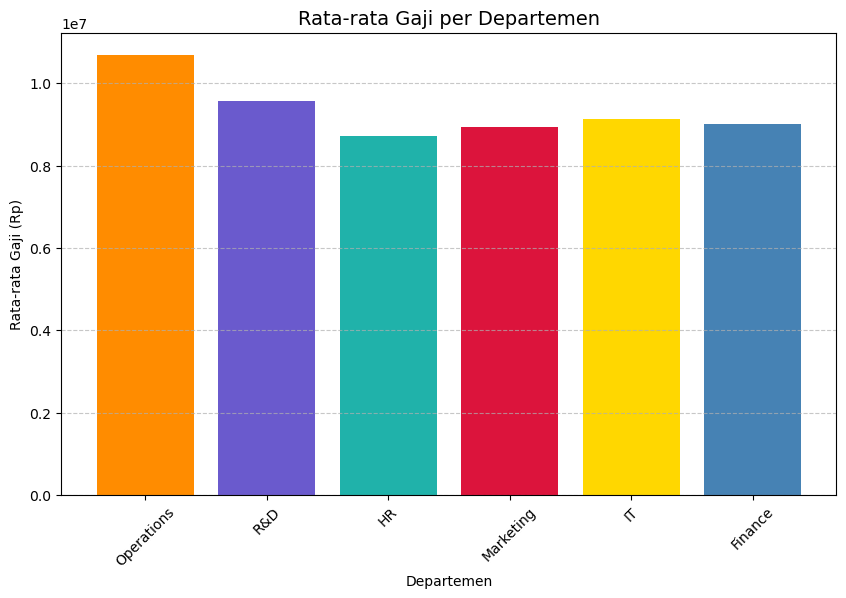

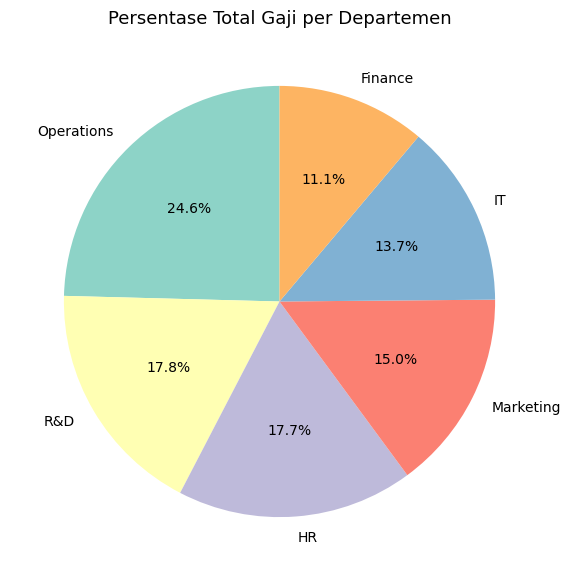

In [65]:
result = spark.sql("""
SELECT 
    e.Department,
    COUNT(e.EmpID) AS Jumlah_Karyawan,
    ROUND(AVG(e.Salary)) AS Rata2_Gaji,
    SUM(e.Salary) AS Total_Gaji,
    d.Dept_Budget AS Anggaran_Departemen
FROM employees e
JOIN departments d
ON e.Department = d.Department
GROUP BY e.Department, d.Dept_Budget
ORDER BY Total_Gaji DESC
""")

result.show()

pdf = result.toPandas()

plt.figure(figsize=(10,6))
plt.bar(pdf["Department"], pdf["Rata2_Gaji"], color=['#FF8C00','#6A5ACD','#20B2AA','#DC143C','#FFD700','#4682B4'])
plt.title("Rata-rata Gaji per Departemen", fontsize=14)
plt.xlabel("Departemen")
plt.ylabel("Rata-rata Gaji (Rp)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(7,7))
plt.pie(pdf["Total_Gaji"], labels=pdf["Department"], autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title("Persentase Total Gaji per Departemen", fontsize=13)
plt.show()